In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('/content/오프라인_전체.xlsx')

In [ ]:
df

,결제일,결제시간,결제내역,합계,결제 할인,카드 결제,현금 결제,환불,환불 일시,카테고리,상품명,수량,상품별 단가,상품별 합계
0,2022-02-28,18:24:04,드립백 클래식 외 1건,18100,-,18100,-,-,-,블렌딩원두,종이백,1,100,100
1,2022-02-28,18:24:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,드립백/캡슐,드립백 클래식,1,18000,18000
2,2022-02-28,18:23:51,드립백 클래식 외 1건,18100,-,18100,-,-,-,드립백/캡슐,드립백 클래식,1,18000,18000
3,2022-02-28,18:23:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,블렌딩원두,종이백,1,100,100
4,2022-02-28,18:12:49,캡슐 클래식 외 2건,30100,-,30100,-,-,-,드립백/캡슐,캡슐 클래식,1,15000,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145005,2023-05-01,09:33:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,시그니처,쥬시_유자 아메리카노,1,7000,7000
145006,2023-05-01,09:33:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세트,싱글_Set.(I) 아메리카노,1,13500,13500
145007,2023-05-01,09:26:10,싱글_Set.카페라떼,13500,-,13500,-,-,-,세트,싱글_Set.카페라떼,1,13500,13500
145008,2023-05-01,09:14:50,클래식_Set.아메리카노 외 1건,18000,-,18000,-,-,-,세트,클래식_Set.아메리카노,1,12000,12000


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.groupby('카테고리')['상품명'].unique()

In [ ]:
# df_all : 전체 상품 (환불 데이터 제외)
df_all = df.copy()

# 환불데이터
df_all = df_all[df_all['상품별 합계'] != '-']
df_all = df_all[( df_all['환불'].isna()) | (df_all['환불']==('-'))]
df_all['환불'] = df_all['환불'].fillna(0)
df_all['환불'] = df_all['환불'].replace('-', 0)

#  int 타입 변환
df_all['상품별 합계'] = df_all['상품별 합계'].astype(int)

#df_all['합계'] = df_all['합계'].astype(int)
print(df_all.dtypes)

결제일       object
결제시간      object
결제내역      object
합계        object
결제 할인     object
카드 결제     object
현금 결제     object
환불         int64
환불 일시     object
카테고리      object
상품명       object
수량         int64
상품별 단가     int64
상품별 합계     int64
dtype: object


In [ ]:
len(df_all['결제시간'].unique())

26687

In [ ]:
# beans_df : '카테고리' ->  '싱글원두',  '블렌딩원두' , '드립백/캡슐'
beans_df = df[df['카테고리'].isin(['싱글원두','블렌딩원두', '드립백/캡슐','사업자'])]
beans_df = beans_df[beans_df["상품명"] != "종이백"]
beans_df = beans_df[beans_df["상품명"] != "분쇄  모카모트"]
beans_df = beans_df[beans_df["상품명"] != "분쇄  핸드드립"]
beans_df = beans_df[beans_df["상품명"] != "분쇄 _ 모카포트"]

# drinks_df : 원두,드립백 아닌 데이터(음료나 디저트 등등)
drinks_df = df[~df['카테고리'].isin(['싱글원두','블렌딩원두', '드립백/캡슐','사업자','포장'])]
drinks_df = drinks_df[drinks_df["상품명"] != ("종이백","분쇄  모카모트","분쇄  핸드드립","분쇄 _ 모카포트")]


In [ ]:
beans_df

,결제일,결제시간,결제내역,합계,결제 할인,카드 결제,현금 결제,환불,환불 일시,카테고리,상품명,수량,상품별 단가,상품별 합계
1,2022-02-28,18:24:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,드립백/캡슐,드립백 클래식,1,18000,18000
2,2022-02-28,18:23:51,드립백 클래식 외 1건,18100,-,18100,-,-,-,드립백/캡슐,드립백 클래식,1,18000,18000
4,2022-02-28,18:12:49,캡슐 클래식 외 2건,30100,-,30100,-,-,-,드립백/캡슐,캡슐 클래식,1,15000,15000
5,2022-02-28,18:12:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,드립백/캡슐,캡슐 싱글오리진,1,15000,15000
7,2022-02-28,18:09:20,캡슐 클래식,15000,-,15000,-,-,-,드립백/캡슐,캡슐 클래식,1,15000,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144971,2023-05-01,10:19:48,드립백 쥬시,18000,-,18000,-,-,-,드립백/캡슐,드립백 쥬시,1,18000,18000
144989,2023-05-01,09:58:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,블렌딩원두,김사홍옹 커피처방,1,6000,6000
144990,2023-05-01,09:58:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,싱글원두,콰트로 콜롬비아 100g,1,12000,12000
144992,2023-05-01,09:55:56,김사홍옹 커피처방 외 2건,23100,-,-,-,-,-,블렌딩원두,김사홍옹 커피처방,1,6000,6000


In [ ]:
drinks_df

,결제일,결제시간,결제내역,합계,결제 할인,카드 결제,현금 결제,환불,환불 일시,카테고리,상품명,수량,상품별 단가,상품별 합계
8,2022-02-28,17:50:11,아이스 텐저린 라떼 외 2건,21500,-,21500,-,-,-,MD,RTD 텐라보틀,1,8000,8000
9,2022-02-28,17:50:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,시그니처,아이스 텐저린 라떼,1,7000,7000
10,2022-02-28,17:50:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,비버리지,(I) 얼그레이 밀크티,1,6500,6500
11,2022-02-28,17:42:09,카푸치노 _ 클래식,6000,-,6000,-,-,-,Basic,카푸치노 _ 클래식,1,6000,6000
12,2022-02-28,17:41:31,텐저린카푸치노 외 3건,26500,-,26500,-,-,-,비버리지,따뜻한 어린이 우유,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145005,2023-05-01,09:33:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,시그니처,쥬시_유자 아메리카노,1,7000,7000
145006,2023-05-01,09:33:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세트,싱글_Set.(I) 아메리카노,1,13500,13500
145007,2023-05-01,09:26:10,싱글_Set.카페라떼,13500,-,13500,-,-,-,세트,싱글_Set.카페라떼,1,13500,13500
145008,2023-05-01,09:14:50,클래식_Set.아메리카노 외 1건,18000,-,18000,-,-,-,세트,클래식_Set.아메리카노,1,12000,12000


In [ ]:
# 환불데이터
drinks_df = drinks_df[drinks_df['상품별 합계'] != '-']
beans_df = beans_df[beans_df['상품별 합계'] != '-']
#  int 타입 변환
drinks_df['상품별 합계'] = drinks_df['상품별 합계'].astype(int)
beans_df['상품별 합계'] = beans_df['상품별 합계'].astype(int)


<ipython-input-38-4ea614da0fb3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drinks_df['상품별 합계'] = drinks_df['상품별 합계'].astype(int)
<ipython-input-38-4ea614da0fb3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beans_df['상품별 합계'] = beans_df['상품별 합계'].astype(int)


In [ ]:
drinks_df

,결제일,결제시간,결제내역,합계,결제 할인,카드 결제,현금 결제,환불,환불 일시,카테고리,상품명,수량,상품별 단가,상품별 합계
8,2022-02-28,17:50:11,아이스 텐저린 라떼 외 2건,21500,-,21500,-,-,-,MD,RTD 텐라보틀,1,8000,8000
9,2022-02-28,17:50:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,시그니처,아이스 텐저린 라떼,1,7000,7000
10,2022-02-28,17:50:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,비버리지,(I) 얼그레이 밀크티,1,6500,6500
11,2022-02-28,17:42:09,카푸치노 _ 클래식,6000,-,6000,-,-,-,Basic,카푸치노 _ 클래식,1,6000,6000
12,2022-02-28,17:41:31,텐저린카푸치노 외 3건,26500,-,26500,-,-,-,비버리지,따뜻한 어린이 우유,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145005,2023-05-01,09:33:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,시그니처,쥬시_유자 아메리카노,1,7000,7000
145006,2023-05-01,09:33:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세트,싱글_Set.(I) 아메리카노,1,13500,13500
145007,2023-05-01,09:26:10,싱글_Set.카페라떼,13500,-,13500,-,-,-,세트,싱글_Set.카페라떼,1,13500,13500
145008,2023-05-01,09:14:50,클래식_Set.아메리카노 외 1건,18000,-,18000,-,-,-,세트,클래식_Set.아메리카노,1,12000,12000


In [ ]:
drinks_df.info()

In [ ]:
drinks_df.groupby(['결제일', '결제시간'])['수량'].sum()

결제일         결제시간    
2022-02-10  10:03:28    3
            10:13:57    3
            10:15:59    1
            10:19:36    5
            10:21:45    2
                       ..
2023-05-31  16:53:23    2
            17:04:46    2
            17:20:51    1
            17:22:16    1
            17:24:37    2
Name: 수량, Length: 58404, dtype: int64

In [ ]:
beans_df.info()

In [ ]:
beans_df.groupby(['결제일', '결제시간'])['수량'].sum()

결제일         결제시간    
2022-02-10  10:41:21    2
            11:08:16    1
            11:42:16    1
            11:44:36    1
            12:29:40    1
                       ..
2023-05-31  15:36:42    1
            16:37:23    1
            16:59:06    2
            17:08:49    1
            17:21:24    2
Name: 수량, Length: 9959, dtype: int64

In [ ]:
beans_df.head(50)

In [ ]:
#전체 합계
all_sums = df_all.groupby(['결제일', '결제시간'])['합계'].sum()
all_mean = all_sums.mean()

# 월두,드립백 아닌 상품 합계
product_drink_sums = drinks_df.groupby(['결제일', '결제시간'])['상품별 합계'].sum()
product_drink_mean = product_drink_sums.mean()
# 원두, 드립백 합계
product_bean_sums = beans_df.groupby(['결제일', '결제시간'])['상품별 합계'].sum()
product_bean_mean = product_bean_sums.mean()

print('전체:', all_mean,'음료:',product_drink_mean,'원두:', product_bean_mean)

전체: 18309.67456052464 음료: 15893.954215464693 원두: 27865.990561301336


In [ ]:
upper_30000 = beans_df.groupby(['결제일', '결제시간'])['상품별 합계'].sum() >= 30000
under_30000 = beans_df.groupby(['결제일', '결제시간'])['상품별 합계'].sum() < 30000
all_or_df = df_all.groupby(['결제일', '결제시간'])['상품별 합계'].sum()

In [ ]:
(drinks_df.groupby(['결제일', '결제시간'])['상품별 합계'].sum() >= 30000).count()

58404

In [ ]:
drinks_df.groupby(['결제일', '결제시간'])['상품별 합계'].sum() >= 30000

결제일         결제시간    
2022-02-10  10:03:28     True
            10:13:57    False
            10:15:59    False
            10:19:36    False
            10:21:45    False
                        ...  
2023-05-31  16:53:23    False
            17:04:46    False
            17:20:51    False
            17:22:16    False
            17:24:37    False
Name: 상품별 합계, Length: 58404, dtype: bool

In [ ]:
(drinks_df.groupby(['결제일', '결제시간'])['상품별 합계'].sum() >= 30000).sum()

3501

In [ ]:
(drinks_df.groupby(['결제일', '결제시간'])['상품별 합계'].sum()).count()

58404

In [ ]:
df_all.groupby(['결제일', '결제시간'])['상품별 합계'].sum().count()

65874

In [ ]:
upper_30000 = drinks_df.groupby(['결제일', '결제시간'])['상품별 합계'].sum() >= 30000
under_30000 = drinks_df.groupby(['결제일', '결제시간'])['상품별 합계'].sum() < 30000
all_or_df = df_all.groupby(['결제일', '결제시간'])['상품별 합계'].sum()

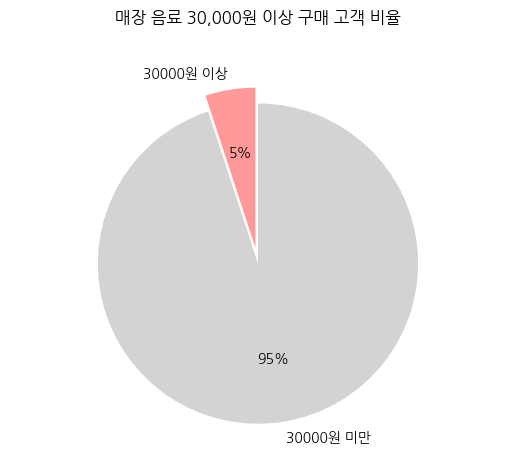

In [ ]:
import matplotlib.pyplot as plt

ratio = [upper_30000.sum(), all_or_df.count()]

labels = ['30000원 이상', '30000원 미만']
explode = (0.1, 0)
colors = ['#ff9999', 'lightgrey']

fig1, ax1 = plt.subplots()

ax1.pie(ratio, labels=labels, autopct='%.f%%', startangle=90, colors=colors,
        explode=explode)

ax1.axis('equal')
plt.title('매장 음료 30,000원 이상 구매 고객 비율', pad=35)
plt.show()


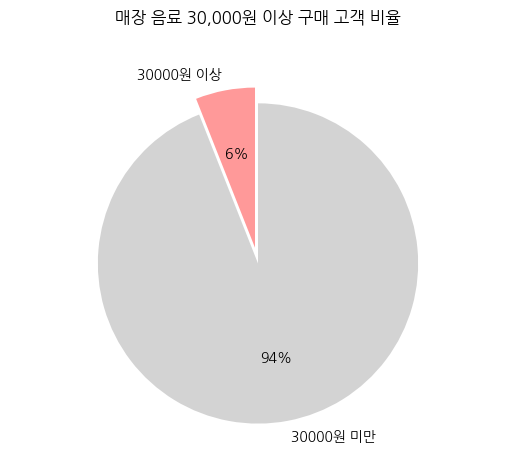

In [ ]:
import matplotlib.pyplot as plt

ratio = [upper_30000.sum(), under_30000.sum()]

labels = ['30000원 이상', '30000원 미만']
explode = (0.1, 0)
colors = ['#ff9999', 'lightgrey']

fig1, ax1 = plt.subplots()

ax1.pie(ratio, labels=labels, autopct='%.f%%', startangle=90, colors=colors,
        explode=explode)

ax1.axis('equal')
plt.title('매장 음료 30,000원 이상 구매 고객 비율', pad=35)
plt.show()


In [ ]:
df_all.groupby(['결제일', '결제시간'])['수량'].sum()

결제일         결제시간    
2022-02-10  10:03:28    3
            10:13:57    3
            10:15:59    1
            10:19:36    5
            10:21:45    2
                       ..
2023-05-31  17:08:49    2
            17:20:51    1
            17:21:24    3
            17:22:16    1
            17:24:37    2
Name: 수량, Length: 65874, dtype: int64

In [ ]:
total_order_qty.isna

<bound method Series.isna of 결제일         결제시간    
2022-02-10  10:03:28    3
            10:13:57    3
            10:15:59    1
            10:19:36    5
            10:21:45    2
                       ..
2023-05-31  17:08:49    2
            17:20:51    1
            17:21:24    3
            17:22:16    1
            17:24:37    2
Name: 수량, Length: 65874, dtype: int64>

In [ ]:
(df_all.groupby(['결제일', '결제시간'])['수량'].sum()).sum()

159245

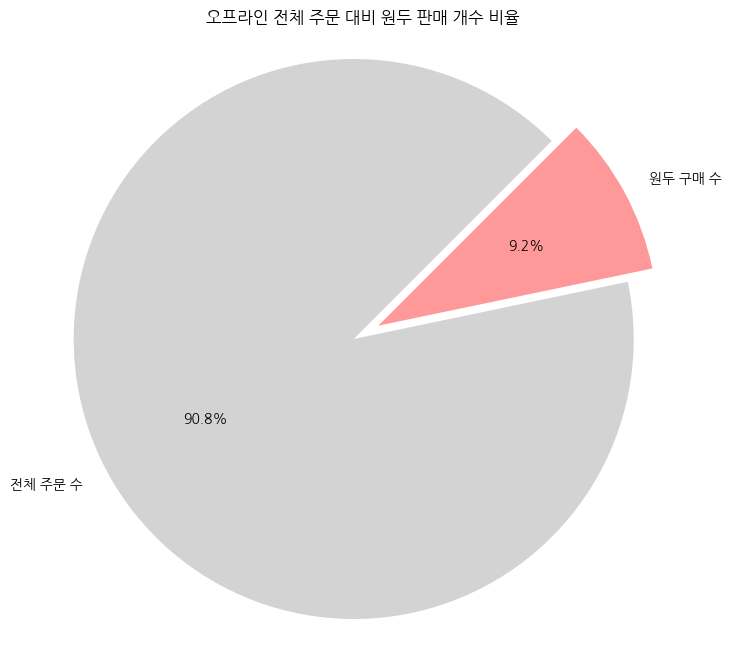

In [ ]:
# 주문 수량
total_order_qty = (df_all.groupby(['결제일', '결제시간'])['수량'].sum()).sum()
beans_order_qty = (beans_df.groupby(['결제일', '결제시간'])['수량'].sum()).sum()


# 전체 주문 수량 대비 원두 구매 수량 비율 계산
ratio = beans_order_qty / total_order_qty

colors = [ 'lightgrey','#ff9999']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie([total_order_qty, beans_order_qty], labels=['전체 주문 수', '원두 구매 수'],  explode=explode, startangle=45, autopct='%1.1f%%',colors=colors)
plt.title('오프라인 전체 주문 대비 원두 판매 개수 비율')
plt.axis('equal')
plt.show()

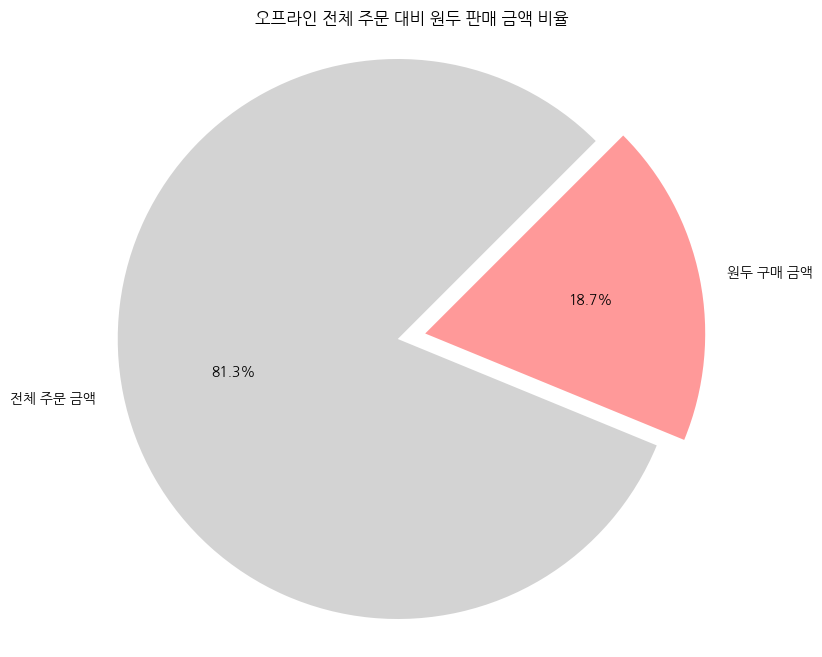

In [ ]:

total_order_qty = (df_all.groupby(['결제일', '결제시간'])['상품별 합계'].sum()).sum()
beans_order_qty = (beans_df.groupby(['결제일', '결제시간'])['상품별 합계'].sum()).sum()

ratio = beans_order_qty / total_order_qty

colors = ['lightgrey', '#ff9999']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie([total_order_qty, beans_order_qty], labels=['전체 주문 금액', '원두 구매 금액'],   explode=explode, startangle=45, autopct='%1.1f%%',colors=colors)
plt.title('오프라인 전체 주문 대비 원두 판매 금액 비율')
plt.axis('equal')
plt.show()